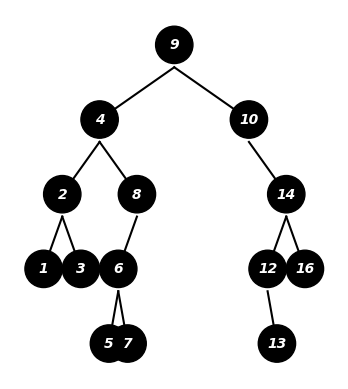

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
def insert(root, value):
    if root is None:
        return Node(value)
    elif value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root
def plot_tree(node, x, y, branch, ax):
    if node:
        circle = patches.Circle((x, y), radius=0.25, edgecolor='black', facecolor='black')
        ax.add_patch(circle)
        ax.text(x, y, str(node.value), style='italic', weight='bold', ha='center', va='center', color='white')
        if node.left:
            ax.plot([x, x - branch], [y - 0.3, y - 1], 'k-')
            plot_tree(node.left, x - branch, y - 1, branch / 2, ax)
        if node.right:
            ax.plot([x, x + branch], [y - 0.3, y - 1], 'k-')
            plot_tree(node.right, x + branch, y - 1, branch / 2, ax)
def display_binary_tree(root):
    fig, ax = plt.subplots()
    plot_tree(root, 0, 0, 1, ax)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.show()
numbers = [9, 4, 2,1, 3, 8, 6, 5, 7, 10, 14, 12, 13, 16]
tree_root = None
for num in numbers:
    tree_root = insert(tree_root, num)
display_binary_tree(tree_root)

In [20]:
#LNR LRN NLR
def inorder_traversal(node):
    if node:
        inorder_traversal(node.left)
        print(node.value, end=' ')
        inorder_traversal(node.right)

def postorder_traversal(node):
    if node:
        postorder_traversal(node.left)
        postorder_traversal(node.right)
        print(node.value, end=' ')

def preorder_traversal(node):
    if node:
        print(node.value, end=' ')
        preorder_traversal(node.left)
        preorder_traversal(node.right)

In [21]:
tree_root = None
for num in numbers:
    tree_root = insert(tree_root, num)
#LNR
print("Inorder traversal:")
inorder_traversal(tree_root)
#LRN
print("\nPostorder traversal:")
postorder_traversal(tree_root)
#NLR
print("\nPreorder traversal:")
preorder_traversal(tree_root)

Inorder traversal:
1 2 3 4 5 6 7 8 9 10 12 13 14 16 
Postorder traversal:
1 3 2 5 7 6 8 4 13 12 16 14 10 9 
Preorder traversal:
9 4 2 1 3 8 6 5 7 10 14 12 13 16 

In [22]:
#tìm kiếm phâ tử
def search(node, value):
    if node is None or node.value == value:
        return node
    if value < node.value:
        return search(node.left, value)
    else:
        return search(node.right, value)

In [23]:
search_value = 4
result = search(tree_root, search_value)
if result:
    print(f"Phần tử {search_value} được tìm thấy trong cây.")
else:
    print(f"Phần tử {search_value} không tồn tại trong cây.")

Phần tử 4 được tìm thấy trong cây.


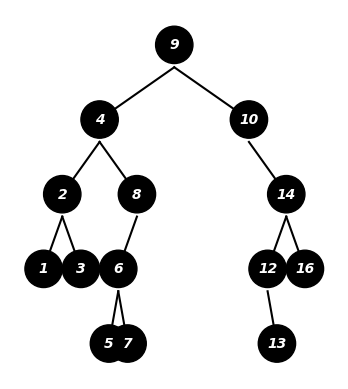

In [24]:
tree_root = None
for num in numbers:
    tree_root = insert(tree_root, num)
display_binary_tree(tree_root)

In [25]:
#Xóa Node
def find_min_value_node(node):
    current = node
    while current.left:
        current = current.left
    return current

def delete_node(root, value):
    if root is None:
        return root

    if value < root.value:
        root.left = delete_node(root.left, value)
    elif value > root.value:
        root.right = delete_node(root.right, value)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left

        min_value_node = find_min_value_node(root.right)
        root.value = min_value_node.value
        root.right = delete_node(root.right, min_value_node.value)

    return root

In [26]:
delete_value = 4
tree_root = delete_node(tree_root, delete_value)
print("Cây sau khi xóa node:")
inorder_traversal(tree_root)

Cây sau khi xóa node:
1 2 3 5 6 7 8 9 10 12 13 14 16 

In [27]:
print("Cây trước khi thêm node:")
inorder_traversal(tree_root)
new_value = 11
tree_root = insert(tree_root, new_value)
print("\nCây sau khi thêm node:")
inorder_traversal(tree_root)

Cây trước khi thêm node:
1 2 3 5 6 7 8 9 10 12 13 14 16 
Cây sau khi thêm node:
1 2 3 5 6 7 8 9 10 11 12 13 14 16 

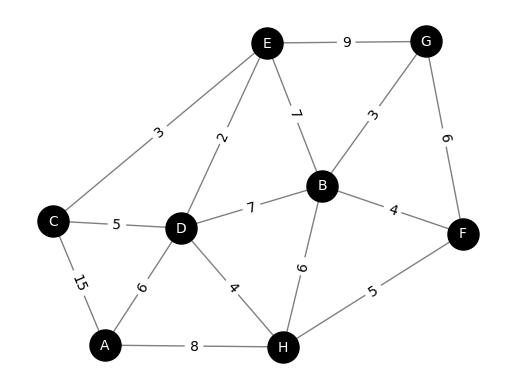

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
# Tạo đồ thị
G = nx.Graph()
# Thêm các cạnh vào đồ thị
G.add_edges_from([('A','D', {'weight': 6}), 
                  ('A', 'H', {'weight': 8}), 
                  ('D', 'H', {'weight': 4}), 
                  ('D', 'C', {'weight': 5}), 
                  ('H', 'F', {'weight': 5}),
                  ('D', 'B', {'weight': 7}),
                  ('B', 'F', {'weight': 4}),
                  ('B', 'G', {'weight': 3}),
                  ('F', 'G', {'weight': 6}),
                  ('D', 'E', {'weight': 2}),
                  ('E', 'G', {'weight': 9}),
                  ('C', 'E', {'weight': 3}),
                  ('B', 'H', {'weight': 6}),
                  ('B', 'E', {'weight': 7}),
                  ('A', 'C', {'weight': 15}),
])
# Vẽ đồ thị
pos = nx.spring_layout(G)  # Xác định vị trí của các node
nx.draw_networkx_nodes(G, pos, node_color='black', node_size=500)  # Vẽ các node
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)  # Vẽ các cạnh
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')  # Vẽ nhãn các node
# Thêm chỉ số cạnh
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# Hiển thị đồ thị
plt.axis('off')
plt.show()

In [29]:
# Duyệt đồ thị bằng DFS
visited = set()
def dfs(graph, node):
    if node not in visited:
        print(node)
        visited.add(node)
        neighbors = graph.neighbors(node)
        for neighbor in neighbors:
            dfs(graph, neighbor)
# Gọi hàm DFS
dfs(G, 'A')

A
D
H
F
B
G
E
C


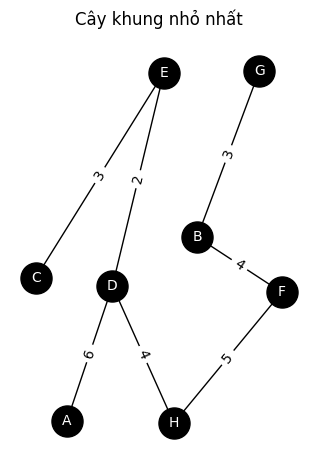

In [30]:
T = nx.minimum_spanning_tree(G)
# Vẽ cây khung nhỏ nhất
plt.subplot(122)
nx.draw(T, pos, with_labels=True, node_color='black', node_size=500)
edge_labels = nx.get_edge_attributes(T, 'weight')
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(T, pos, font_size=10, font_color='white')  # Vẽ nhãn các node
plt.title('Cây khung nhỏ nhất')
plt.tight_layout()
plt.show()

In [31]:
# Tính chiều dài cây khung
total_weight = sum([T[u][v]['weight'] for u, v in T.edges()])
# In chiều dài cây khung
print("Chiều dài cây khung nhỏ nhất:", total_weight)

Chiều dài cây khung nhỏ nhất: 27


In [32]:
# Tìm đường đi ngắn nhất từ đỉnh nguồn đến tất cả các đỉnh khác
source = 'A'
shortest_paths = nx.single_source_dijkstra_path_length(G, source)
# In kết quả
print("Đỉnh nguồn:", source)
for target, distance in shortest_paths.items():
    print("Đỉnh", target, "- Khoảng cách:", distance)

Đỉnh nguồn: A
Đỉnh A - Khoảng cách: 0
Đỉnh D - Khoảng cách: 6
Đỉnh H - Khoảng cách: 8
Đỉnh E - Khoảng cách: 8
Đỉnh C - Khoảng cách: 11
Đỉnh B - Khoảng cách: 13
Đỉnh F - Khoảng cách: 13
Đỉnh G - Khoảng cách: 16


In [33]:
import pandas as pd
# Tạo danh sách dữ liệu
A = [True, True, False, False]
B = [True, False, True, False]
data = {
    'A': A,
    'B': B,
    'A AND B': [a and b for a, b in zip(A, B)],
    'A OR B': [a or b for a, b in zip(A, B)],
    'A XOR B': [a != b for a, b in zip(A, B)],
    'A -> B': [not a or b for a, b in zip(A, B)]
}
# Tạo DataFrame từ danh sách dữ liệu
df = pd.DataFrame(data)
# In DataFrame
df

,A,B,A AND B,A OR B,A XOR B,A -> B
0,True,True,True,True,False,True
1,True,False,False,True,True,False
2,False,True,False,True,True,True
3,False,False,False,False,False,True


CHU TRÌNH EULER

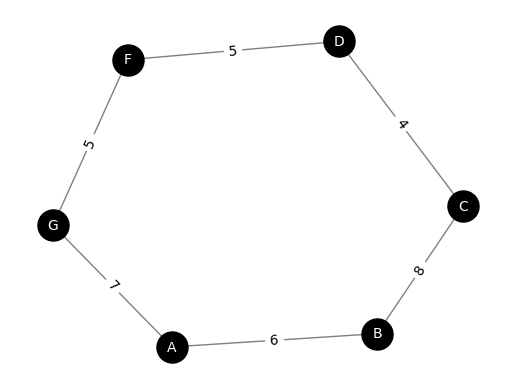

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
# Tạo đồ thị
G = nx.Graph()
# Thêm các cạnh vào đồ thị
G.add_edges_from([('A','B', {'weight': 6}), 
                  ('B', 'C', {'weight': 8}), 
                  ('C', 'D', {'weight': 4}), 
                  ('D', 'F', {'weight': 5}), 
                  ('F', 'G', {'weight': 5}),
                  ('G', 'A', {'weight': 7}),
                #   ('A','C', {'weight': 6}), 
                #   ('A','D', {'weight': 6}), 
])
# Vẽ đồ thị
pos = nx.spring_layout(G)  # Xác định vị trí của các node
nx.draw_networkx_nodes(G, pos, node_color='black', node_size=500)  # Vẽ các node
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)  # Vẽ các cạnh
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')  # Vẽ nhãn các node
# Thêm chỉ số cạnh
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# Hiển thị đồ thị
plt.axis('off')
plt.show()


Chu trình Euler:
A -> G
G -> F
F -> D
D -> C
C -> B
B -> A


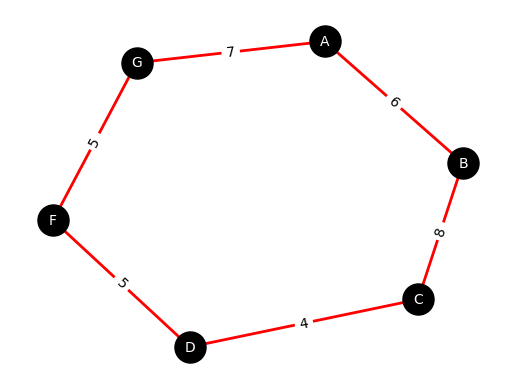

In [35]:
# Tìm chu trình Euler
try:
    cycle = list(nx.eulerian_circuit(G, source='A'))
    print("Chu trình Euler:")
    for u, v in cycle:
        print(u, "->", v)   
    # Vẽ đồ thị và chu trình Euler
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')    
    # Vẽ chu trình Euler
    edge_color = 'r'
    edge_width = 2
    for u, v in cycle:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, width=edge_width)   
    # Thêm chỉ số cạnh
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)    
    plt.axis('off')
    plt.show()
    
except nx.NetworkXError:
    print("Đồ thị không có chu trình Euler!")